In [1]:
import sys 
sys.path.append('/home/user/')

In [2]:
from pysymmetry_dev01 import *
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def generators2d(n):#Nota:temporario

    string_reflexao_sigma = ''
    for j in range(1,(n/2+1).floor()):
        for k in range(0,n):
            string_reflexao_sigma = string_reflexao_sigma + str((k*n+j,k*n+n-j+1))
    
    string_reflexao_miDp = ''
    for i in range(1, n):
        for j in range(i+1, n+1):            
            string_reflexao_miDp = string_reflexao_miDp + str(((i-1)*n+j,(j-1)*n+i))
            
    return [string_reflexao_sigma, string_reflexao_miDp]

In [4]:
n = 10
M = laplacian2d(n)
G = nGroup(generators2d(n))
gens = G.gens()
img = [g.matrix() for g in gens]
r = G.nrepresentation(gens, img)
base = G.nbase_change_reduction(r)
blocks = base.get_blocks(M)

In [5]:
eigvals2d = []
for i, b in enumerate(blocks):
    v = np.linalg.eigvals(b.toarray())
    eigvals2d.append(v)
    mult = base._info[i][0]
    if mult>1:
        for j in range(mult-1):
            eigvals2d.append(v)    
eigvals2d = sorted(np.concatenate(eigvals2d))

In [6]:
full_matrix2d = sorted(np.linalg.eigvalsh(M.toarray()))

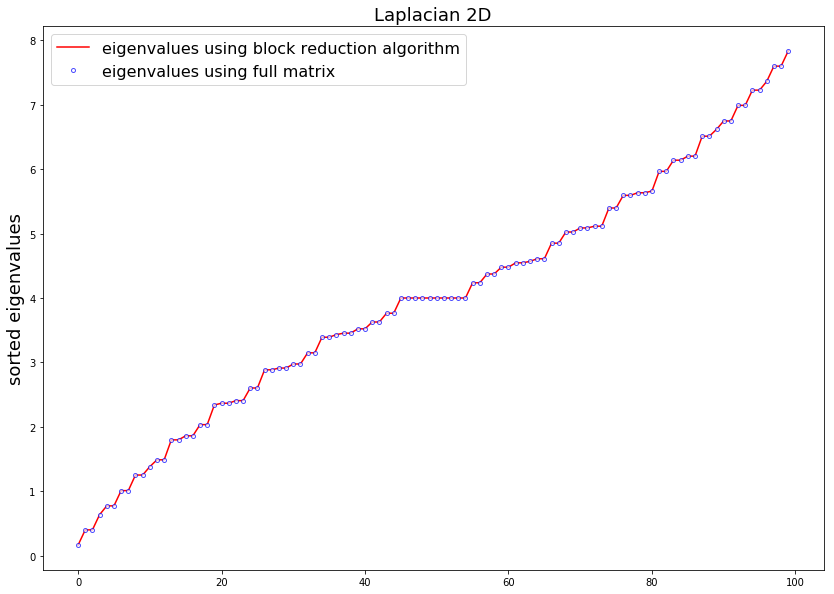

In [7]:
#fig = plt.figure(figsize=(14,10))
fig, ax = plt.subplots(figsize=(14,10))
ax.plot(eigvals2d, color='red', label='eigenvalues using block reduction algorithm')
ax.plot(full_matrix2d, 'o', label='eigenvalues using full matrix',
        markerfacecolor='white', markeredgecolor='blue', alpha=0.7, markersize=4)
#ax.set_xlabel('numbers of eigenvalues', fontsize=18)
ax.set_ylabel('sorted eigenvalues', fontsize=18)
ax.set_title('Laplacian 2D',fontsize=18 )
plt.legend(fontsize=16)

plt.show()